In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/20202/Computer Vision/Project1

Mounted at /content/drive
/content/drive/MyDrive/20202/Computer Vision/Project1


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# **1. Ảnh hạt gạo**




### **a. Ảnh 1**

(461, 461, 3)


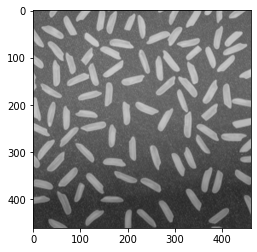

In [ ]:
img_path = './data/rice1.png'

img = cv2.imread(img_path)
print(img.shape)
plt.imshow(img)


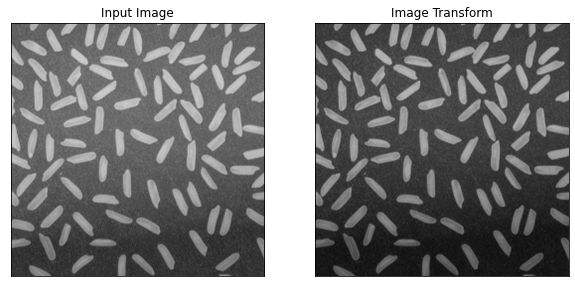

In [ ]:
# power-law transformation

img_gamma = np.array(255*(img/255)**1.5,dtype='uint8')

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_gamma, cmap = 'gray')
plt.title('Image Transform'), plt.xticks([]), plt.yticks([])
plt.show()

**cv2.GaussianBlur()**: We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.

**Canny:**
Hysteresis Thresholding

This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:



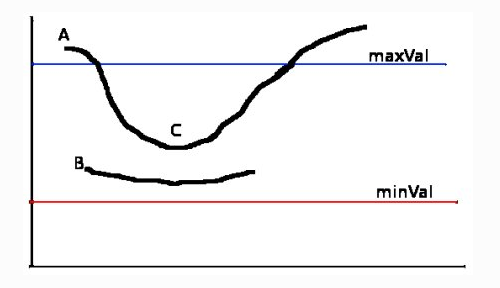

The edge A is above the maxVal, so considered as “sure-edge”. Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any “sure-edge”, so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

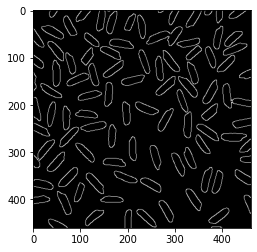

In [ ]:
minVal = 100
maxVal = 200
gaussian_img = cv2.GaussianBlur(img,(5,5),0)
edges = cv2.Canny(gaussian_img, minVal, maxVal) # bước này đã bao gồm chuyển ảnh sang dạng nhị phân
plt.imshow(edges, cmap='gray')

Trong openCV, tìm các contours như là tìm các vật thể màu trắng từ nền màu đen --> object cần tìm nên là màu trắng và background nên là màu đen.

Có 3 tham số trong hàm cv2.findContours():
- đầu tiên là hình ảnh gốc
- thứ 2 là phương pháp trích xuất contours: RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE, RETR_FLOODFILL.
- thứ 3 là phương pháp xấp xỉ contour: CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1, CHAIN_APPROX_TC89_KCOS.

Kết quả trả ra là contours và hierarchy. Trong đó:
- contours là một list của toàn bộ các contours xác định trong hình ảnh. Mỗi một contour là một numpy array của các tọa độ  của các điểm biên trong object.
- hierarchy: Danh sách các vector, chứa mối quan hệ giữa các contour.


In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Sau khi trích xuất được các contour thì chúng ta sẽ vẽ các contour đó thông qua hàm **cv2.drawContours()**. Nó có thể được sử dụng để vẽ bất kì hình dạng nào mà bạn có các tọa độ điểm biên của nó. Các tham số chính của hàm số này:

- Tham số đầu tiên: Hình ảnh gốc.
- Tham số thứ 2: List các contours cần vẽ. Mỗi một phần tử của list là array tọa độ các điểm biên của một contour.
- Tham số thứ 3: Index của contour. Chẳng hạn chúng ta chỉ muốn lựa chọn ra một contour ở những index nhất định thuộc list contours thì khai báo index tại đây. Muốn vẽ toàn bộ các contours thì thiết lập giá trị cho tham số này bằng -1.
- Thành phần còn lại sẽ chính là tham số về màu sắc, độ dày của contour.

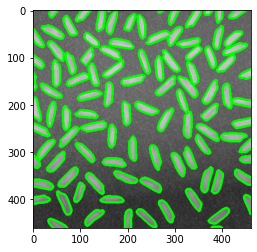

In [ ]:
# Vì drawContours sẽ thay đổi ảnh gốc nên cần lưu ảnh sang một biến mới.
img1 = img.copy()

# Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)
plt.imshow(img1)

Để biết diện tích của contour ta dùng hàm **cv2.contourArea()**

In [ ]:
area_contours = [cv2.contourArea(contour) for contour in contours]
print(area_contours[:10])

[3.0, 25.0, 46.5, 639.0, 6.0, 687.5, 704.0, 512.5, 8.0, 12.5]


In [ ]:
thresold_area = 705
contour_select = [contour for contour in contours if cv2.contourArea(contour)>=thresold_area]
print('Số object trong ảnh: {}'.format(len(contour_select)))

Số object trong ảnh: 19


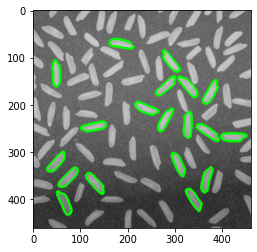

In [ ]:
img2 = img.copy()

# Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img2, contour_select, -1, (0, 255, 0), 3)
plt.imshow(img2)

### **b. Ảnh 2: Nhiễu muối tiêu**

(461, 461, 3)


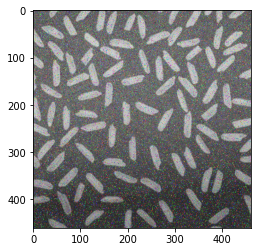

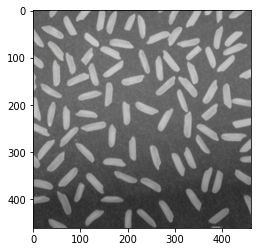

### **c. Ảnh 3: Nhiễu sin, cos**

Method: Removing periodic noise from an image using the Fourier Transform

Reference: 
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform


What are the (low/high) frequencies in an image?

  ‒ Frequency = intensity change

  ‒ Slow changes (homogeneous /blur regions): low frequency

  ‒ Fast/abrupt changes (egde, contour, noise): high frequency

Most of energy concentrated in low frequencies

Animageis a visual signal ‒> We can analyse the frequencies of the signal

We will create a new «image» which will contains all frequencies of the image: Like a 2D frequency graphic.The basic tool for it is the Fourier Transform

Một hàm bất kỳ có thể được viết lại xấp xỉ dưới dạng tổng có trọng số của của các hàm sin và cos (có tần số khác nhau).

Một biến đổi fourier của tín hiệu sẽ biểu diễn trục x là tần số, trục y là trọng số tương ứng 

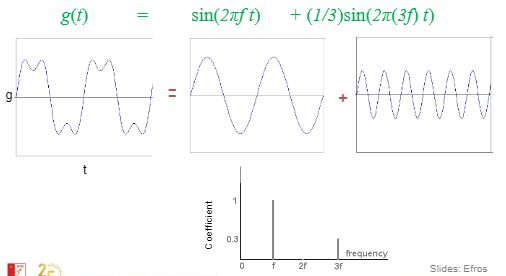

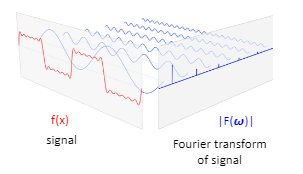

Với ảnh 2 chiều, biểu diễn fourier trong miền tần số là ảnh 2 chiều, giá trị pixel càng lớn (càng sáng) thì trọng số tương ứng càng cao (u và v là hai trục tần số)

Hay nói cách khác, biểu diễn ảnh trong miền tần số biểu thị các biên độ và tần số của sin / cosin mà khi được cộng lại, sẽ cho bạn hình ảnh ban đầu.

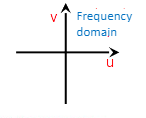

(461, 461)


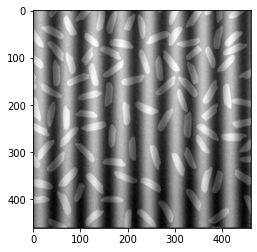

In [ ]:
img_path = './data/rice3.png'

img = cv2.imread(img_path, 0)
print(img.shape)
plt.imshow(img, cmap='gray')

Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT

You can consider an image as a signal which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency representation of image.

More intuitively, for the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. You can extend the same idea to images. Where does the amplitude varies drastically in images ? At the edge points, or noises. So we can say, edges and noises are high frequency contents in an image. If there is no much changes in amplitude, it is a low frequency component.

**Fourier Transform in OpenCV**

OpenCV provides the functions **cv2.dft()** and **cv2.idft()** for this.
It returns two channels. First channel will have the real part of the result and second channel will have the imaginary part of the result. The input image should be converted to **np.float32 first**.

once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by N/2 in both the directions. This is simply done by the function **np.fft.fftshift()**. (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.


cv2.dft() - tìm biến đổi của ảnh trong miền không gian sang miền tần số

cv2.idft() - làm ngược lại, biến đổi ảnh miền tần số sang miền không gian (được sử dụng sau quá trình thực hiện một vài xử lý ảnh trên miền tần số như lọc thông thấp, lọc thông cao, ...)

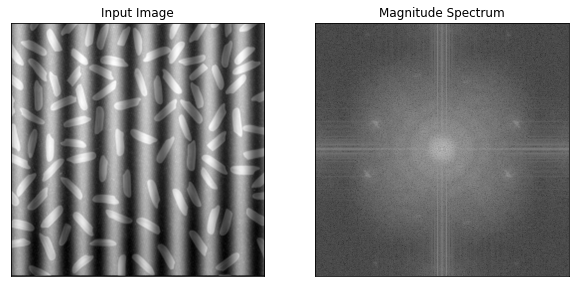

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_path = './data/rice3.png'

img = cv2.imread(img_path, 0)
print(img.shape)
plt.imshow(img, cmap='gray')

# Ảnh đầu vào phải là ảnh xám
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Dịch tọa độ 0,0 vào giữa
dft_shift = np.fft.fftshift(dft)

# lấy độ lớn và pha
# mag, phase = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])

# log transform độ lớn để tăng độ tương phản của ảnh kết quả
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()

See, You can see more whiter region at the center showing low frequency content is more.

(461, 461)


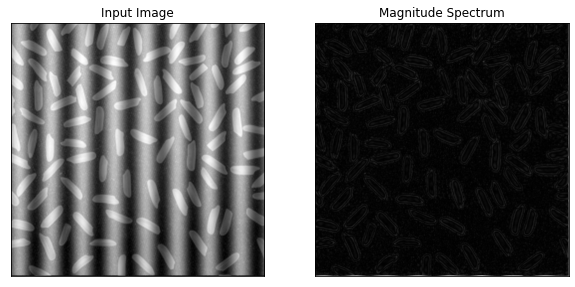

In [ ]:
# Áp dụng lọc thông cao (đặt vùng tần số thấp - vùng giữa ảnh bằng 0)
# đoạn code này loại bỏ vùng tần số thấp bằng cửa sổ kích thước 60x60

img_path = './data/rice3.png'
img = cv2.imread(img_path, 0)
print(img.shape)

# Ảnh đầu vào phải là ảnh xám
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Dịch tọa độ 0,0 vào giữa
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2

fshift = dft_shift.copy()
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

f_ishift = np.fft.ifftshift(fshift) # dịch lại tọa độ 0,0 về góc trên bên trái
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) # ảnh sau khi đã iDFT

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(461, 461)


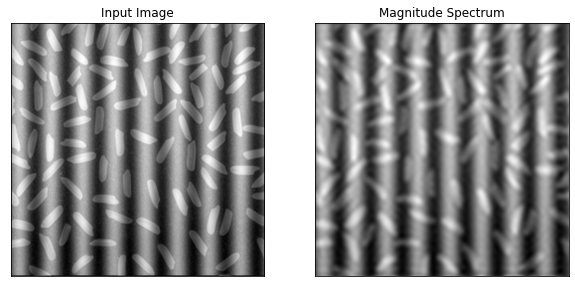

In [ ]:
# Áp dụng lọc thông thấp (ở giữa bằng 1, bên ngoài bằng 0)

img_path = './data/rice3.png'
img = cv2.imread(img_path, 0)
print(img.shape)

# Ảnh đầu vào phải là ảnh xám
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Dịch tọa độ 0,0 vào giữa
dft_shift = np.fft.fftshift(dft)


rows, cols = img.shape
crow, ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1


# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift) # dịch lại tọa độ 0,0 về góc trên bên trái
img_back = cv2.idft(f_ishift) # trả về số phức --> cần lấy độ lớn
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) # ảnh sau khi đã iDFT

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(461, 461)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log


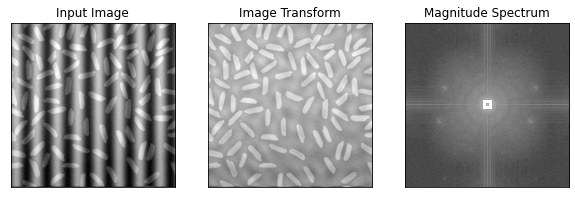

In [ ]:
# Band-pass filtering

img_path = './data/rice3.png'
img = cv2.imread(img_path, 0)
print(img.shape)

# Ảnh đầu vào phải là ảnh xám
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# Dịch tọa độ 0,0 vào giữa
dft_shift = np.fft.fftshift(dft)


rows, cols = img.shape
crow, ccol = rows//2 , cols//2
r1 = 7
r2 = 10
# tạo mask r1->r2 = 0, còn lại bằng 1
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-r2:crow+r2, ccol-r2:ccol+r2] = 0
mask[crow-r1:crow+r1, ccol-r1:ccol+r1] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift) # dịch lại tọa độ 0,0 về góc trên bên trái
img_back = cv2.idft(f_ishift) # trả về số phức --> cần lấy độ lớn
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) # ảnh sau khi đã iDFT

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image Transform'), plt.xticks([]), plt.yticks([])

magnitude_spectrum = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
plt.subplot(133)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])
plt.show()

### **d. Ảnh lệch sáng**

(461, 461)


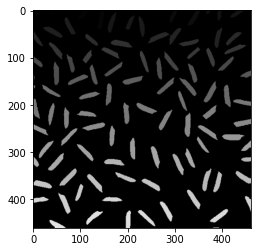

In [ ]:
img_path = './data/rice4.png'

img = cv2.imread(img_path, 0)
print(img.shape)
plt.imshow(img, cmap='gray')

The general form of power-law transformation is: s = c . r^y

- ‘s’ and ‘r’ are the output and input pixel values
- y > 1: compress values in dark area, while expanding values in light area
- y < 1 : expand values in dark area, while compressing values in light area
- r : normalized values to [0, 1]
- c :  scaling constant c corresponding to the bit size used

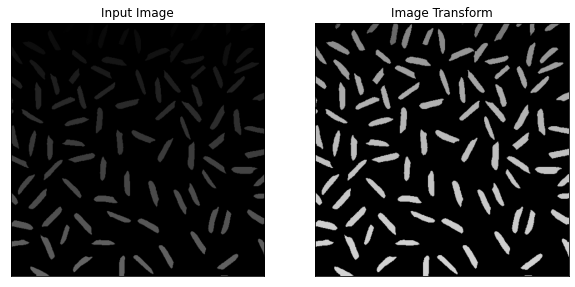

In [ ]:
# power-law transformation
img_path = './data/rice4.png'
img = cv2.imread(img_path)

img_gamma = np.array(255*(img/255)**0.2,dtype='uint8')

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_gamma, cmap = 'gray')
plt.title('Image Transform'), plt.xticks([]), plt.yticks([])
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2
 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 3 3 3
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 4 4 4 4 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 5 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 3 7 7 7
 7 7 7 7 7 7 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 7 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 5 0 0 0 0 0 0 0 0 0 0 0 0 0]


<function matplotlib.pyplot.imshow>

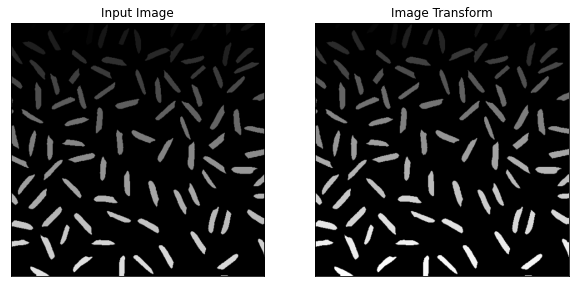

In [ ]:
# Cân bằng Histogram
img_path = './data/rice4.png'
img = cv2.imread(img_path,0)
img_equalHist = cv2.equalizeHist(img)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_equalHist, cmap = 'gray')
plt.title('Image Transform'), plt.xticks([]), plt.yticks([])
plt.show()

# **2. Ảnh đồ vật văn phòng**

a. Object4


(458, 610)


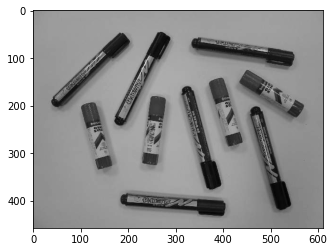

In [ ]:
img_path = './data/objects4.jpg'

img = cv2.imread(img_path, 0)
print(img.shape)
plt.imshow(img, cmap='gray')

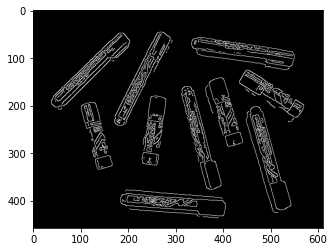

In [ ]:
minVal = 0
maxVal = 70
gaussian_img = cv2.GaussianBlur(img,(5,5),0)
edges = cv2.Canny(gaussian_img, minVal, maxVal) # bước này đã bao gồm chuyển ảnh sang dạng nhị phân
plt.imshow(edges, cmap='gray')

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

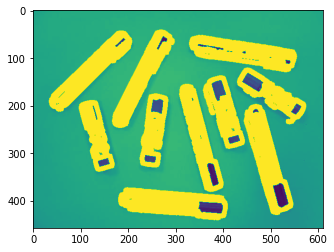

In [ ]:
# Vì drawContours sẽ thay đổi ảnh gốc nên cần lưu ảnh sang một biến mới.
img1 = img.copy()

# Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img1, contours, -1, (255, 255, 0), 10)
plt.imshow(img1)

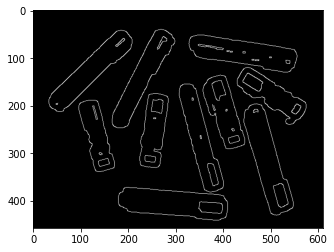

In [ ]:
# Thực hiện tìm cạnh và contour lặp lại lần nữa trên ảnh img1
minVal = 100
maxVal = 200
gaussian_img1 = cv2.GaussianBlur(img1,(5,5),0)
edges = cv2.Canny(gaussian_img1, minVal, maxVal) # bước này đã bao gồm chuyển ảnh sang dạng nhị phân
plt.imshow(edges, cmap='gray')

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
area_contours = [cv2.contourArea(contour) for contour in contours]
print(area_contours[:10])

[11351.0, 11121.5, 6090.0, 6482.0, 8756.5, 7445.5, 7175.5, 10497.5, 9477.0, 8895.0]


In [ ]:
thresold_area = 5000
contour_select = [contour for contour in contours if cv2.contourArea(contour)>=thresold_area]
print('Số object trong ảnh: {}'.format(len(contour_select)))

Số object trong ảnh: 10


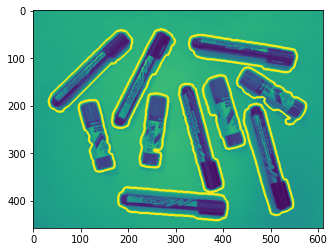

In [ ]:
img2 = img.copy()

# Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img2, contour_select, -1, (255, 255, 0), 3)
plt.imshow(img2)

b. Object3

(458, 610)


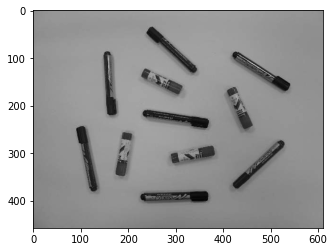

In [ ]:
img_path = './data/objects3.jpg'

img = cv2.imread(img_path,0)
print(img.shape)
plt.imshow(img, cmap='gray')

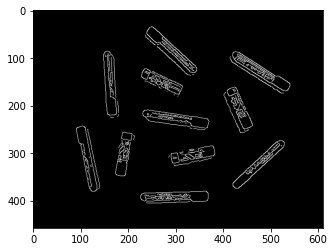

In [ ]:
minVal = 0
maxVal = 70
gaussian_img = cv2.GaussianBlur(img,(5,5),0)
edges = cv2.Canny(gaussian_img, minVal, maxVal)
plt.imshow(edges, cmap='gray')

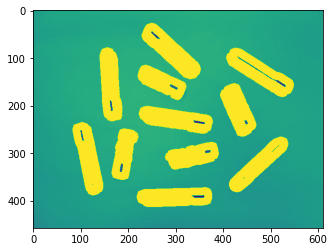

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img1 = img.copy()

cv2.drawContours(img1, contours, -1, (255, 255, 0), 15)
plt.imshow(img1)

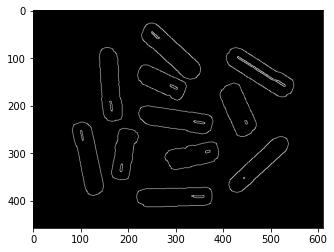

In [ ]:
minVal = 100
maxVal = 200
gaussian_img1 = cv2.GaussianBlur(img1,(5,5),0)
edges = cv2.Canny(gaussian_img1, minVal, maxVal) # bước này đã bao gồm chuyển ảnh sang dạng nhị phân
plt.imshow(edges, cmap='gray')

[5689.5, 4447.0, 5339.0, 4000.0, 5769.5, 5891.5, 5002.5, 4132.0, 6429.5, 5678.5, 6182.5]
Số object trong ảnh: 11


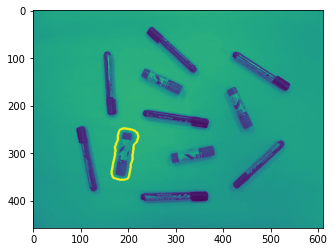

In [ ]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
thresold_area = 0
contour_select = [contour for contour in contours if cv2.contourArea(contour)>=thresold_area]
print([cv2.contourArea(contour) for contour in contour_select])
print('Số object trong ảnh: {}'.format(len(contour_select)))
img2 = img.copy()

# Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img2, contour_select, 3, (255, 255, 0), 3)
plt.imshow(img2)

## **Tổng hợp thành hàm**

In [ ]:
def count2(img_path, threshold, thin=10):
  img = cv2.imread(img_path, 0)

  # Canny và contour lần 1
  minVal = 0
  maxVal = 70
  gaussian_img = cv2.GaussianBlur(img,(5,5),0)
  edges1 = cv2.Canny(gaussian_img, minVal, maxVal)
  contours1, hierarchy = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  img1 = img.copy()
  cv2.drawContours(img1, contours1, -1, (255, 255, 0), thin) # thin: độ dày của nét vẽ

  # Canny và contour lần 2
  minVal = 100
  maxVal = 200
  gaussian_img2 = cv2.GaussianBlur(img1,(5,5),0)
  edges2 = cv2.Canny(gaussian_img2, minVal, maxVal)
  contours2, hierarchy = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  thresold_area = threshold
  contour_select = [contour for contour in contours2 if cv2.contourArea(contour)>=thresold_area]
  print('Số object trong ảnh: {}'.format(len(contour_select)))

  img2 = img.copy()
  # Vẽ toàn bộ contours trên hình ảnh gốc
  cv2.drawContours(img2, contour_select, -1, (255, 255, 0), 3)

  plt.figure(figsize=(10, 5))
  plt.subplot(121)
  plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])

  plt.subplot(122)
  plt.imshow(img2)
  plt.title('Object'), plt.xticks([]), plt.yticks([])
  plt.show()


Số object trong ảnh: 11


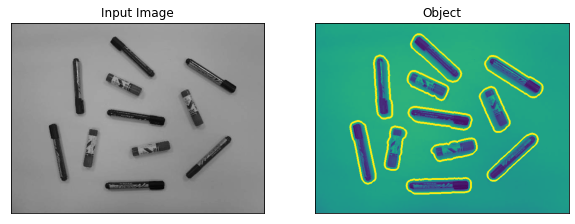

In [ ]:
img_path = './data/objects3.jpg'
threshold = 3000
thin = 12
count2(img_path, threshold, thin)

In [ ]:
1: 500
2: 500
3: 3000
4: 5000